In [94]:
import matplotlib.pyplot as plt
import numpy as np


In [160]:
def paint(xs, keys, out_name='hist.pdf'):
    plt.style.use('seaborn-bright')
    plt.style.use('fivethirtyeight')
    fig = plt.figure()

    index = np.arange(10)
    total_width, n = 0.8, len(xs)
    width = total_width / n
#     index = index - (total_width - width) / (n-1)
    tick_labels = [ "{}%-{}%".format((i-1) * 10, (i)*10) for i in range(1, 11)]
    
    for i, x in enumerate(xs):
        counts, bins = np.histogram(x, bins=10)
        dist = counts / counts.sum()
        plt.bar(index + i*width, dist, label=keys[i],  width=width, tick_label=tick_labels, align='center')#, align=)
    plt.ylabel('Probabilities')
    plt.xticks(rotation=45)
    plt.xlabel('Global Dist Rank')
    plt.legend(loc='upper left')
    plt.savefig(out_name, format='pdf', bbox_inches = 'tight')

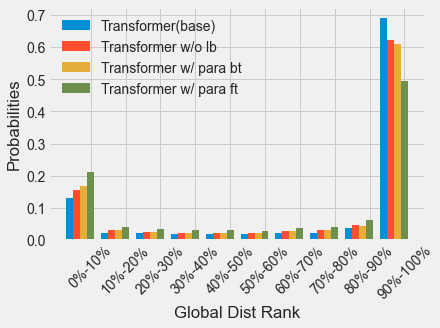

In [166]:
a = np.loadtxt('ende_dfstopk_wmt14.en-de.transformer.ed_dist.top_10.txt')
b = np.loadtxt('ende_dfstopk_wmt14.en-de.transformer.nolb.ed_dist.top_10.txt')
c = np.loadtxt('ende_dfstopk_wmt14.en-de.transformer.para_bt.ed_dist.top_10.txt')
d = np.loadtxt('ende_dfstopk_wmt14.en-de.transformer.para_ft.ed_dist.top_10.txt')
keys = ['Transformer(base)', 'Transformer w/o lb', 'Transformer w/ para bt', 'Transformer w/ para ft',]
paint([a, b, c, d], keys, out_name='trans_hist.pdf')

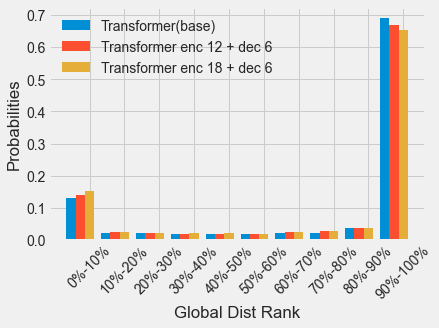

In [162]:
a = np.loadtxt('ende_dfstopk_wmt14.en-de.transformer.ed_dist.top_10.txt')
b = np.loadtxt('ende_dfstopk_wmt14.en-de.transformer.12+6_beam_10.ed_dist.top_10.txt')
c = np.loadtxt('ende_dfstopk_wmt14.en-de.transformer.18+6_beam_10.ed_dist.top_10.txt')

keys = ['Transformer(base)', 'Transformer enc 12 + dec 6', 'Transformer enc 18 + dec 6']
paint([a,b,c], keys, out_name='deeper_hist.pdf')

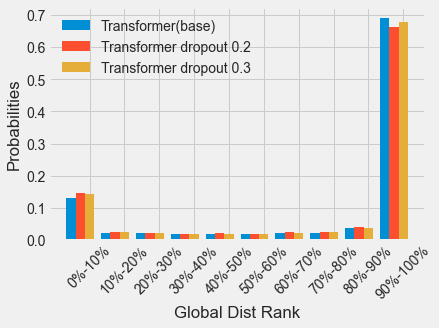

In [163]:
# dropout
a = np.loadtxt('ende_dfstopk_wmt14.en-de.transformer.ed_dist.top_10.txt')
b = np.loadtxt('ende_dfstopk_wmt14.en-de.transformer.dp0.2.ed_dist.top_10.txt')
c = np.loadtxt('ende_dfstopk_wmt14.en-de.transformer.dp0.3.ed_dist.top_10.txt')
keys = ['Transformer(base)', 'Transformer dropout 0.2', 'Transformer dropout 0.3']
paint([a,b,c], keys, out_name='dropout_hist.pdf')

In [164]:
# dropout
a = np.loadtxt('ende_dfstopk_wmt14.en-de.transformer.ed_dist.top_10.txt')
b = np.loadtxt('ende_dfstopk_wmt14.en-de.transformer.768_beam_10.ed_dist.top_10.txt')
c = np.loadtxt('ende_dfstopk_wmt14.en-de.transformer.big.ed_dist.top_10.txt')
keys = ['Transformer(base)', 'Transformer dim 768', 'Transformer dim 1024']
paint([a,b,c], keys, out_name='wider_hist.pdf')